# **Name : Ghori Zeel JivrajbhaI**

# **Student ID : 202201287**

# **Course : Applied Forecasting Methods**

# **LAB 02 : Neural Network**

# **Colab file link :** https://colab.research.google.com/drive/1zEGsOaYRlrPu8DLp4Czq-RMiNbKtrRHw?usp=sharing

# **PROBLEM 1 : Implement a batch of Neural Networks with a single hidden layer network with,16,32,64,128,256 neurons to obtain the regression estimate. Evaluate the prediction on the test set using RMSE,MAE,MAPE,R2 and training time in seconds.**

In [ ]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

dataset_train = pd.read_csv("/content/train.csv")
dataset_test = pd.read_csv("/content/test.csv")


dataset_train = pd.read_csv("/content/train.csv")
dataset_test = pd.read_csv("/content/test.csv")

X_train = np.array(dataset_train[['Income']])
Y_train = np.array(dataset_train[['Balance']]).ravel()
X_test = np.array(dataset_test[['Income']])
Y_test = np.array(dataset_test[['Balance']]).ravel()


In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

Y_train = scaler_y.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler_y.transform(Y_test.reshape(-1, 1)).flatten()

In [ ]:

hidden_layer_sizes = [16, 32, 64, 128, 256]
results = []

Training model with 16 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


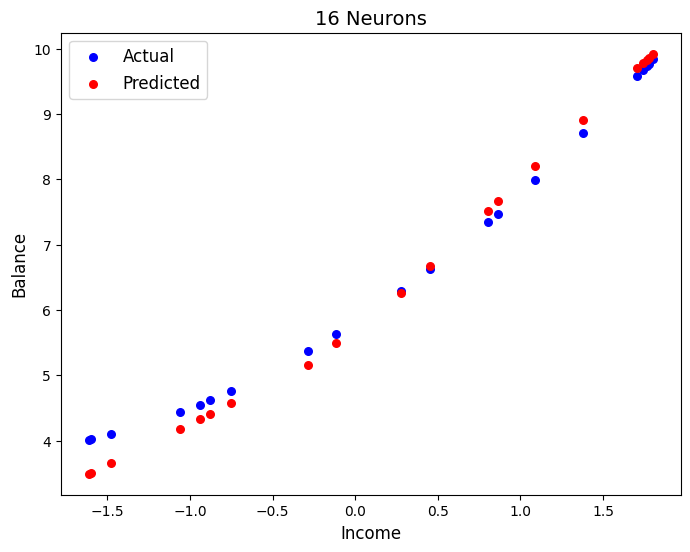

Training model with 32 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


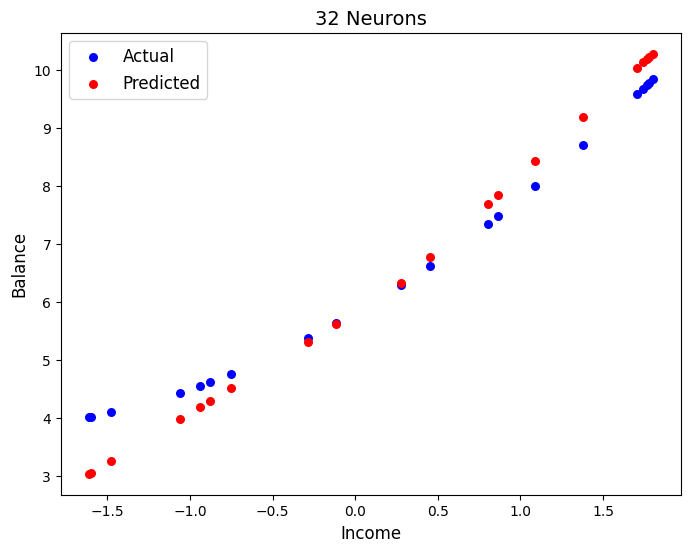

Training model with 64 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


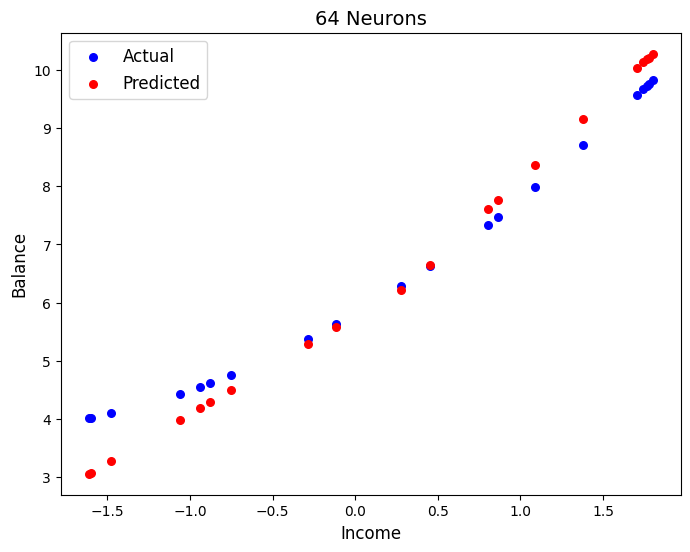

Training model with 128 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


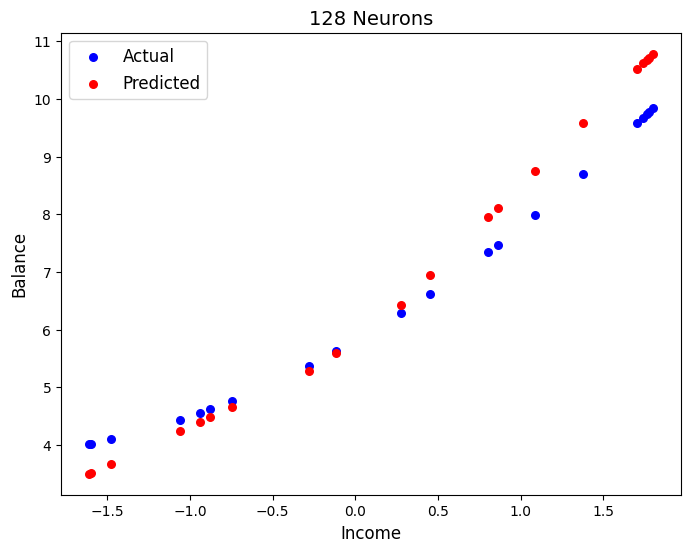

Training model with 256 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


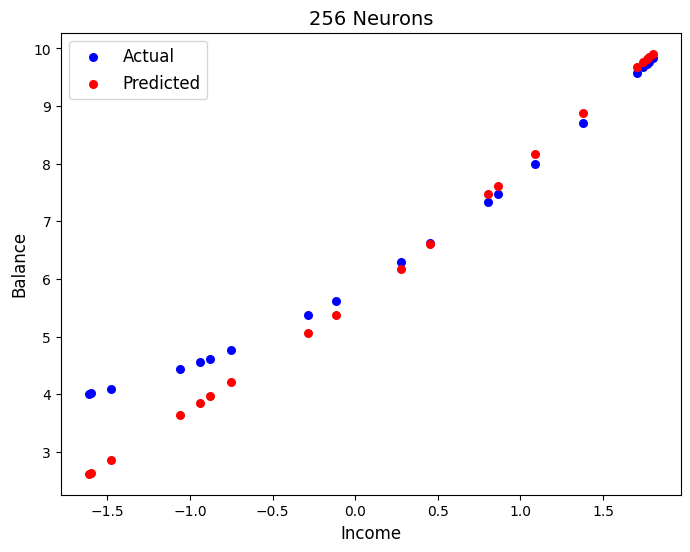

In [ ]:
for neurons in hidden_layer_sizes:
    print(f"Training model with {neurons} neurons...")

    model = Sequential([
        Dense(neurons, input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Activation("relu"),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    start_time = time.time()
    model.fit(X_train, Y_train, epochs=1000, batch_size=5, verbose=0)
    training_time = time.time() - start_time


    y_pred = model.predict(X_test).flatten()


    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    Y_test_original = scaler_y.inverse_transform(Y_test.reshape(-1, 1)).flatten()


    rmse = np.sqrt(mean_squared_error(Y_test_original, y_pred_original))
    mae = mean_absolute_error(Y_test_original, y_pred_original)
    mape = np.mean(np.abs((Y_test_original - y_pred_original) / np.where(Y_test_original == 0, 1e-10, Y_test_original))) * 100
    r2 = r2_score(Y_test_original, y_pred_original)

    results.append([neurons, rmse, mae, mape, r2, training_time])

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test_original, color='blue', label="Actual", s=30)
    plt.scatter(X_test, y_pred_original, color='red', label="Predicted", s=30)
    plt.title(f"{neurons} Neurons", fontsize=14)
    plt.xlabel('Income', fontsize=12)
    plt.ylabel('Balance', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

In [ ]:
results_df = pd.DataFrame(results, columns=["Neurons", "RMSE", "MAE", "MAPE", "R2", "Training Time (s)"])
print(results_df)

   Neurons      RMSE       MAE      MAPE        R2  Training Time (s)
0       16  0.243719  0.203544  3.910668  0.987404          50.585434
1       32  0.490881  0.416459  7.387610  0.948901          50.316374
2       64  0.475476  0.399868  7.134120  0.952058          50.067852
3      128  0.614117  0.513425  7.185802  0.920023          54.980899
4      256  0.613201  0.421881  9.128786  0.920262          55.308187


# **PROBLEM 2 : Boston Housing Price Prediction using Neural Networks. The goal of this study is to build predictive models that estimate the median value of owner-occupied homes based on these factors. This task aims to understand the performance of deep learning (neural networks) in solving a regression problem. The models will be evaluated based on their ability to minimize prediction errors using Mean Squared Error (MSE) and Mean Absolute Error (MAE).**

## Importing libraries and loading dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load dataset
data = pd.read_csv("/content/housing.csv")

## TASK 1 : Data Analysis & Preprocessing

In [ ]:
# Selecting relevant features
X = data.drop(columns=['MEDV'])  # Assuming 'MEDV' is the target variable
y = data['MEDV']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [ ]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [ ]:
data.shape

(489, 4)

In [ ]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [ ]:
data.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


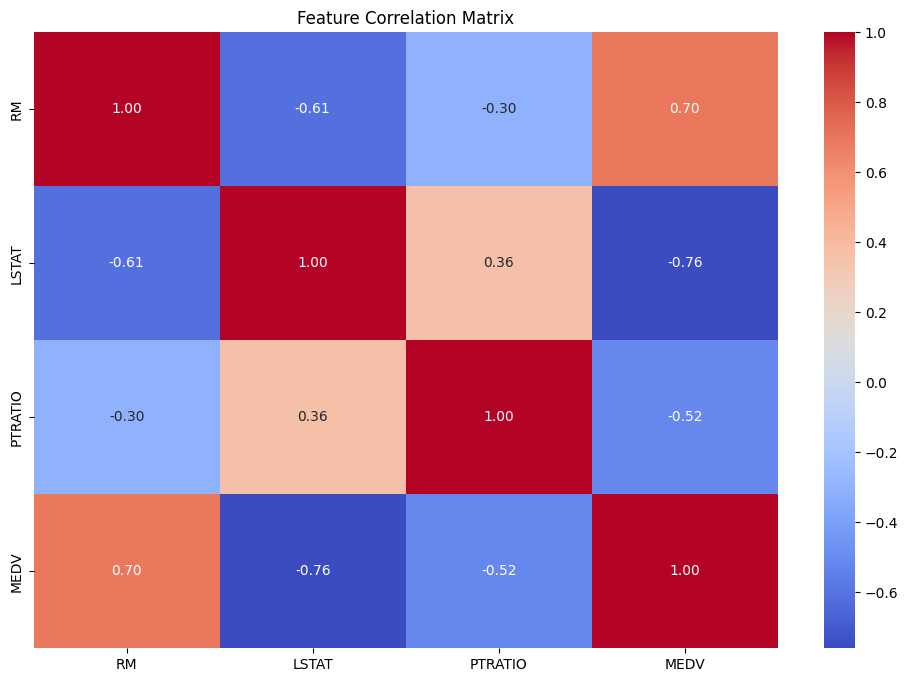

In [ ]:
# Explore feature importance using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

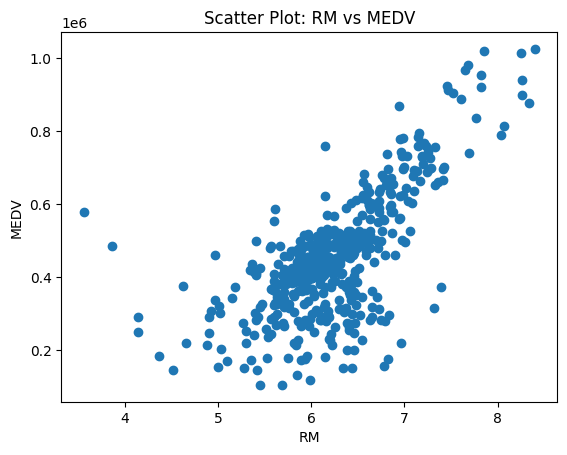

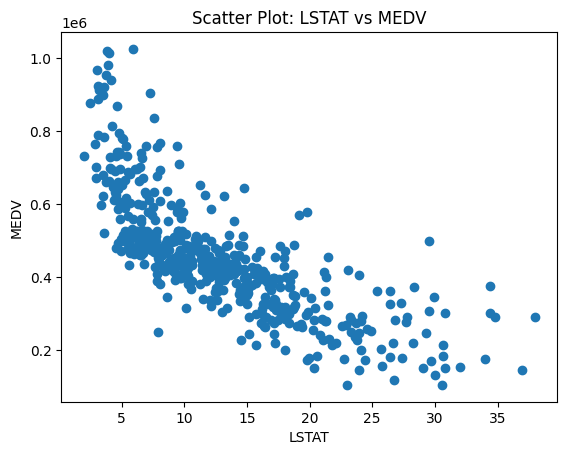

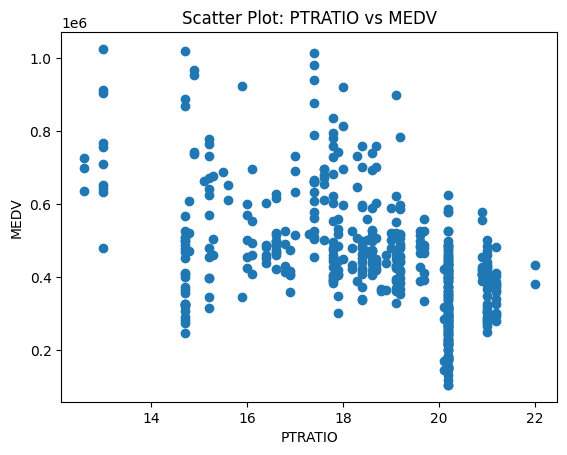

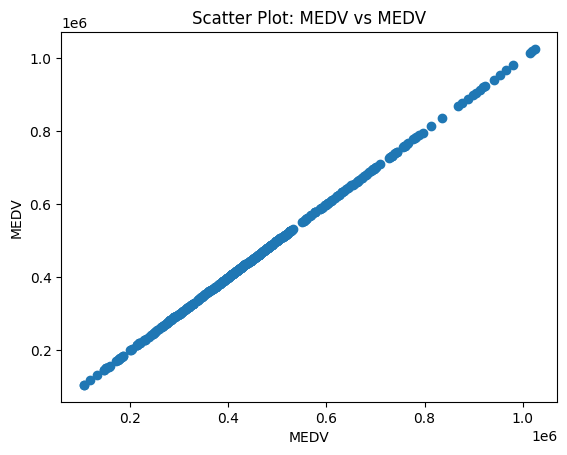

In [ ]:
# Scatter plot for correlation
for col in data.columns:
    plt.scatter(data[col], data['MEDV'])
    plt.title(f"Scatter Plot: {col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [ ]:
# Correlation calculation
correlation = data.corr()
print("correlation of each varable with every other varaibles")
print(correlation)

correlation of each varable with every other varaibles
               RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000


In [ ]:

print("correlation of MEDV with other variables in descending order")
print(correlation['MEDV'].sort_values(ascending=False))

correlation of MEDV with other variables in descending order
MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64


## TASK 2 : Model Development

○ Implement a Neural Network with

i. Single-layer NN: 1 hidden layer

ii. Multi-layer NN (2 layers)

iii. Multi-layer NN (3 layers)

iv. Multi-layer NN (5 layers)

v. Multi-layer NN (8 layers)

In [ ]:
# using 50 epochs
# using 64 neurons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

data = pd.read_csv("/content/housing.csv")

# Assuming 'MEDV' is the target variable
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def build_model(num_layers):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

layer_configs = [1, 2, 3, 5, 8]
results = {}

for layers in layer_configs:
    print(f"Training model with {layers} hidden layers")
    model = build_model(layers)
    history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_data=(X_test, y_test))

    # Predictions and evaluation
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results[layers] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}
    print(f"Model with {layers} layers -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}")

results_df = pd.DataFrame(results).T

print("Final Comparison Table:")
print(results_df)


Training model with 1 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with 1 layers -> RMSE: 448604.0819, MAE: 423590.4375, MAPE: 99.73%, R2: -8.1569
Training model with 2 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model with 2 layers -> RMSE: 137758.1974, MAE: 116395.4609, MAPE: 30.34%, R2: 0.1365
Training model with 3 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model with 3 layers -> RMSE: 73826.7672, MAE: 56392.4023, MAPE: 16.45%, R2: 0.7520
Training model with 5 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model with 5 layers -> RMSE: 67050.4469, MAE: 49670.6016, MAPE: 14.15%, R2: 0.7954
Training model with 8 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model with 8 layers -> RMSE: 60607.4615, MAE: 46377.9531, MAPE: 13.34%, R2: 0.8329
Final Comparison Table:
            RMSE            MAE       MAPE        R2
1  448604.081872  423590.437500  99.727502 -8.156851
2  137758.197433  116395.460938  30.342890  0.136515
3   73826.767178   56392.402344  16.451390  0.752002
5   67050.446919   49670.601562  14.151714  0.795439
8   60607.461455   46377.953125  13.341631  0.832863


## TASK 3 : Comparison & Analysis

● Compare the models' performance to determine how the number of
layers impacts prediction accuracy.

● Plot a graph showing the relationship between the number of layers
vs. MSE/MAE.

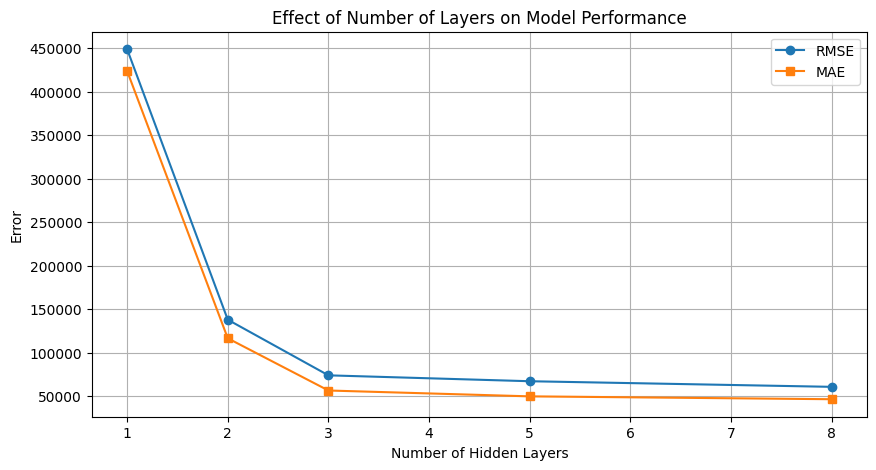

In [ ]:
# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(layer_configs, results_df['RMSE'], marker='o', label='RMSE')
plt.plot(layer_configs, results_df['MAE'], marker='s', label='MAE')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Error")
plt.title("Effect of Number of Layers on Model Performance")
plt.legend()
plt.grid()
plt.show()

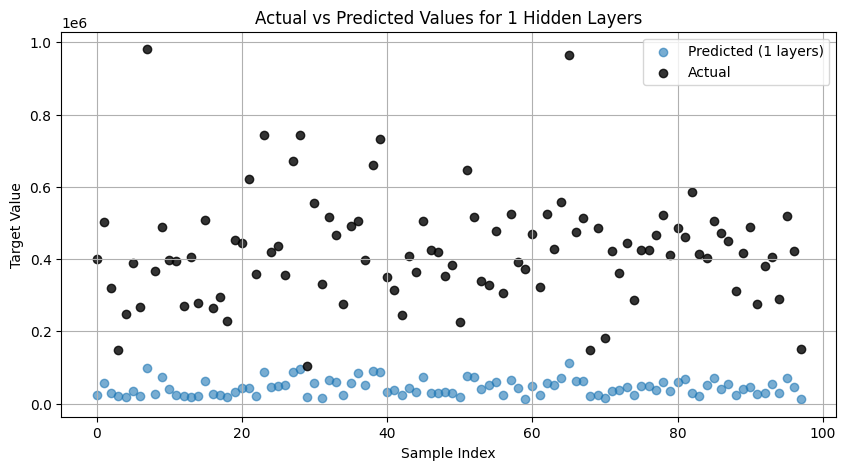

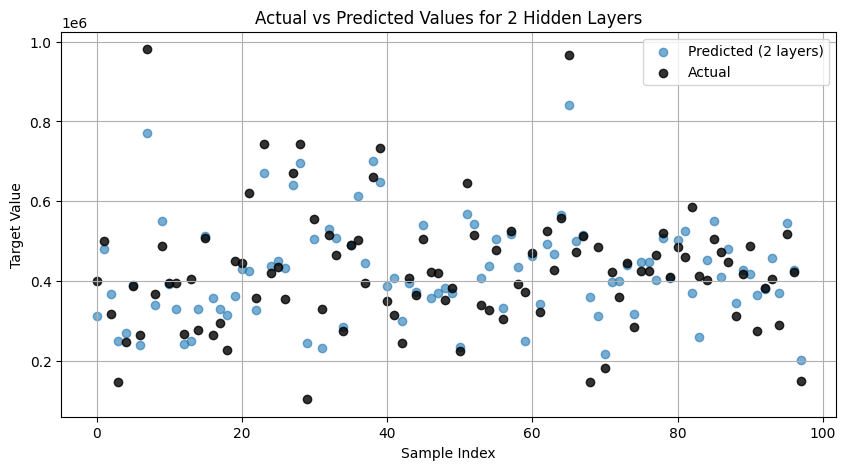

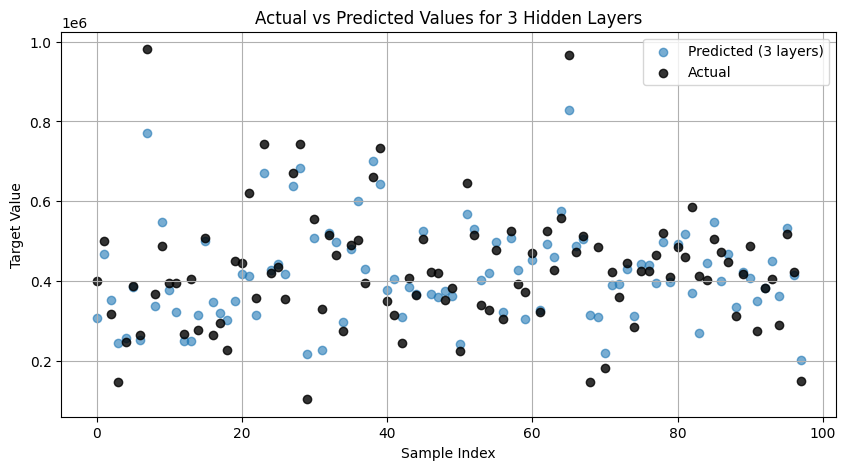

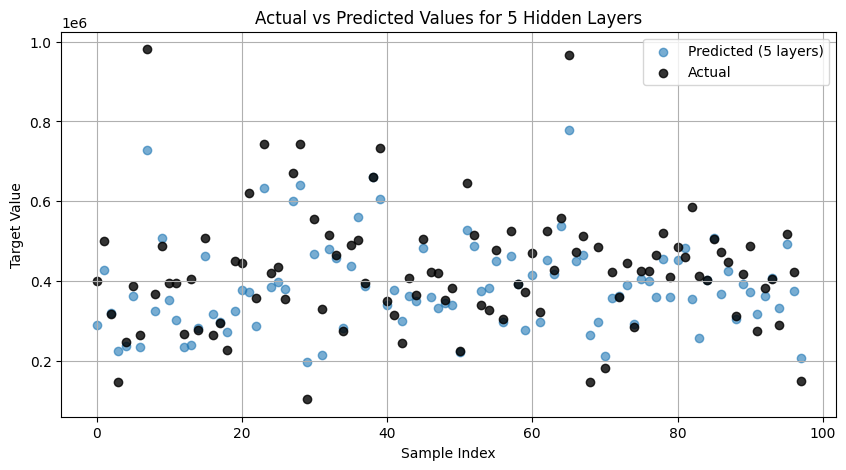

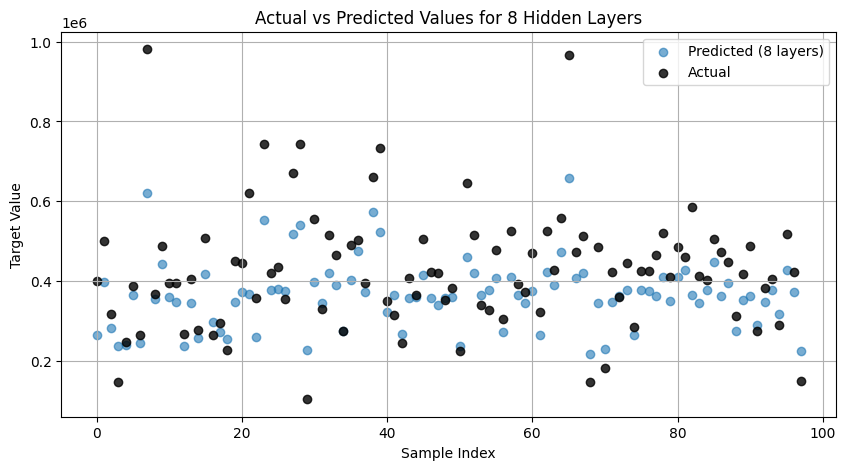

In [ ]:
# Plot Actual vs Predicted values for different layer configurations in separate graphs
for layers, y_pred in predictions.items():
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_test)), y_pred, label=f'Predicted ({layers} layers)', alpha=0.6)
    plt.scatter(range(len(y_test)), y_test, color='black', label='Actual', alpha=0.8)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.title(f"Actual vs Predicted Values for {layers} Hidden Layers")
    plt.legend()
    plt.grid()
    plt.show()


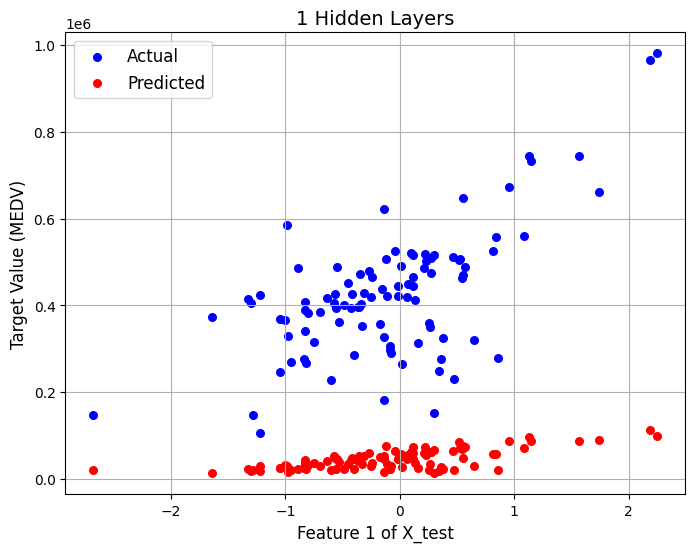

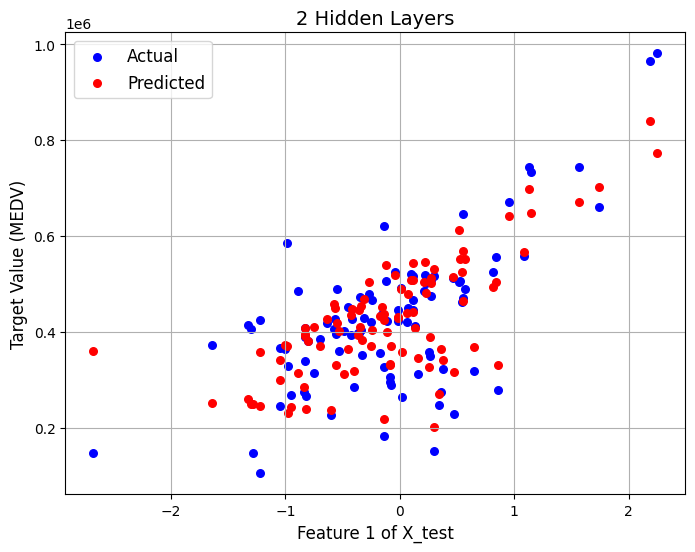

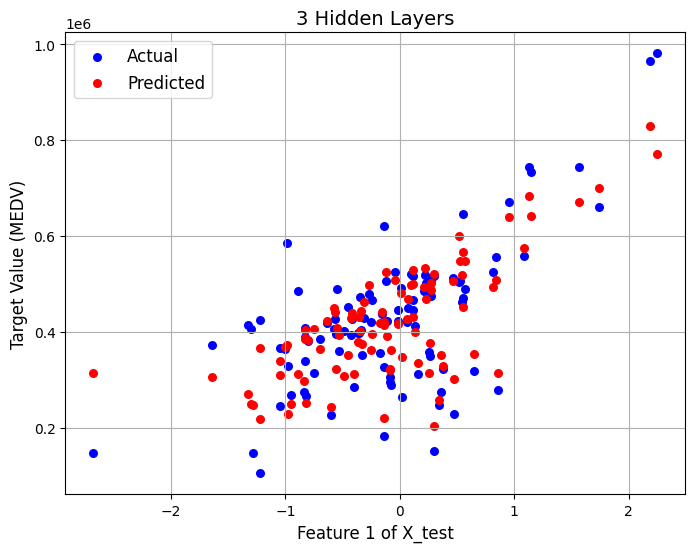

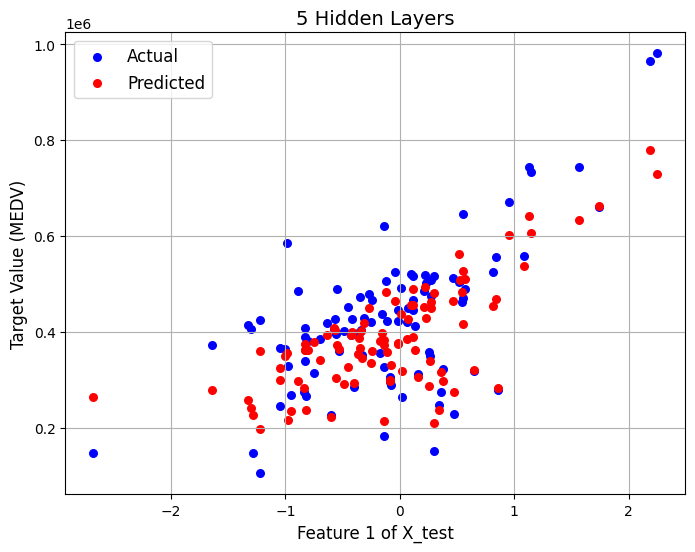

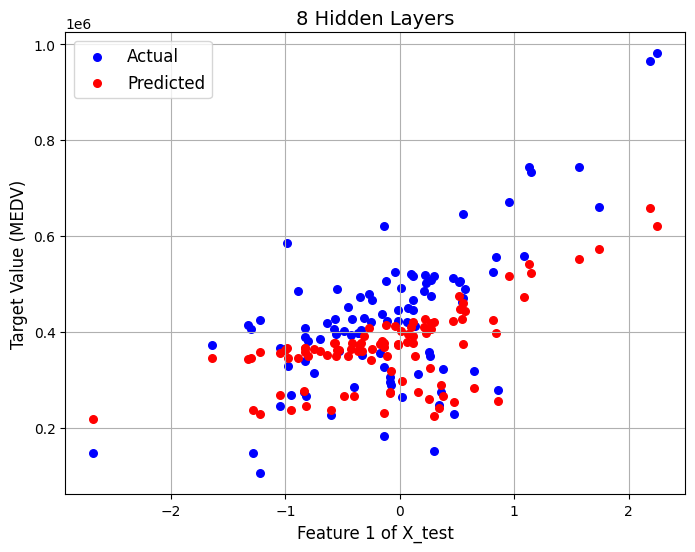

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using feature 1 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 0], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 1 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


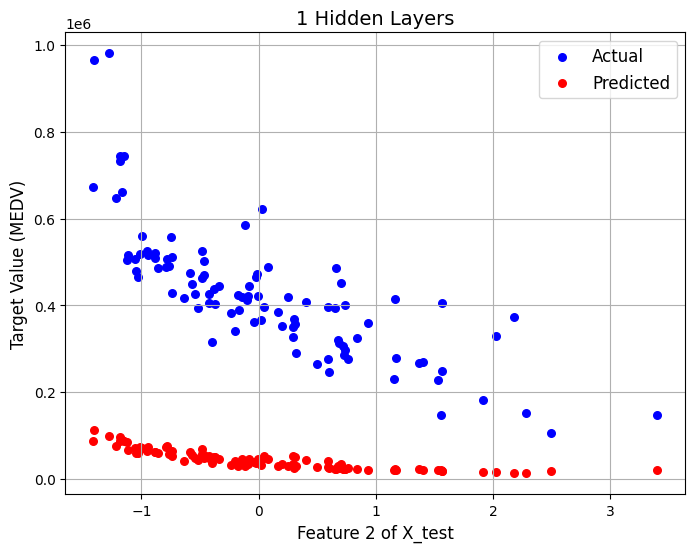

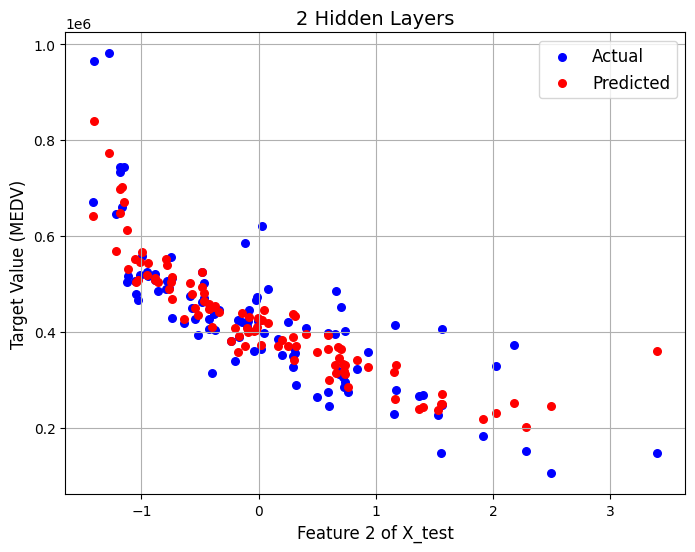

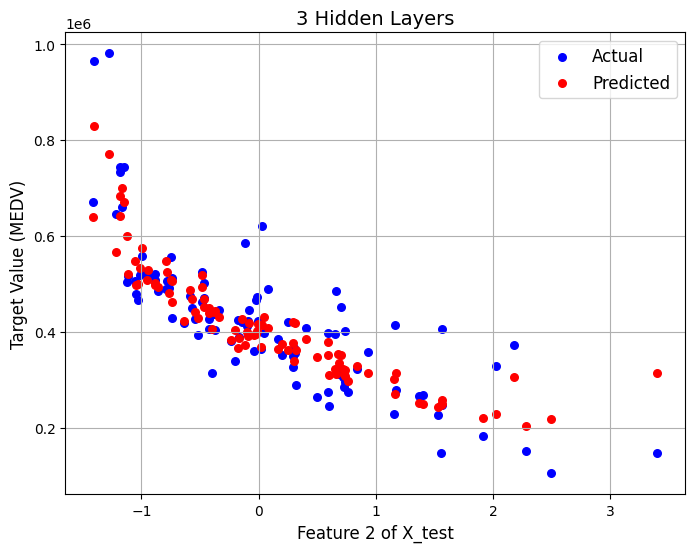

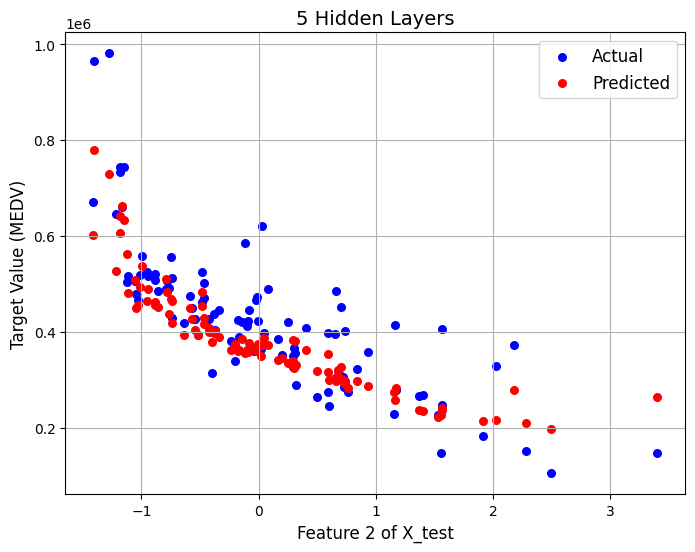

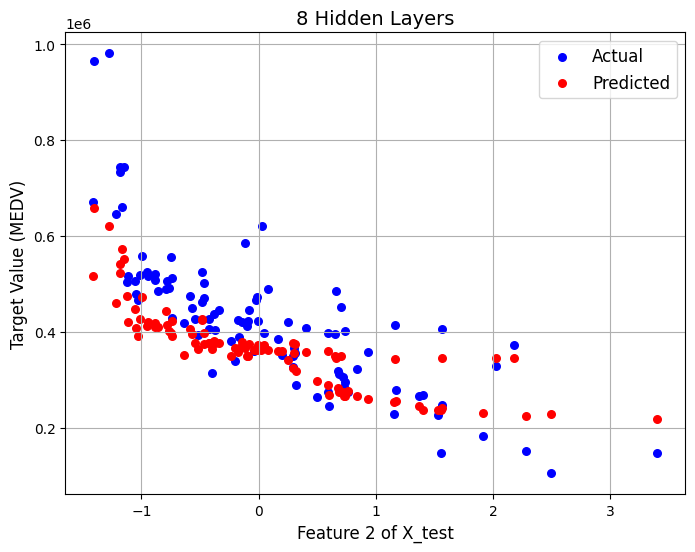

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using feature 2 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 1], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 1], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 2 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


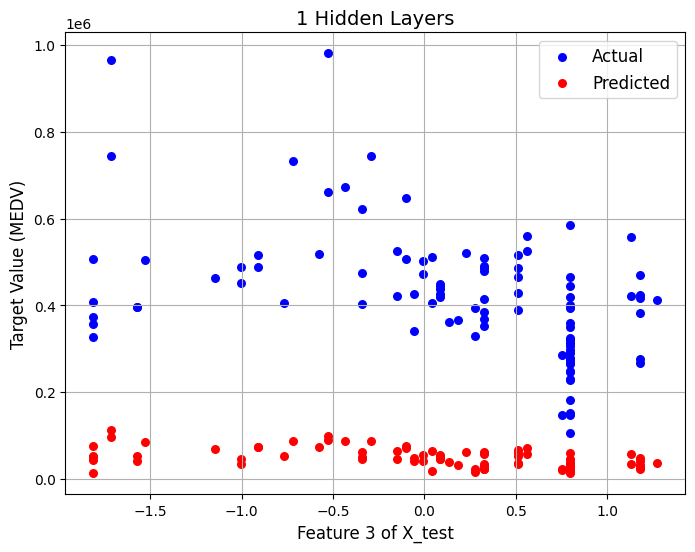

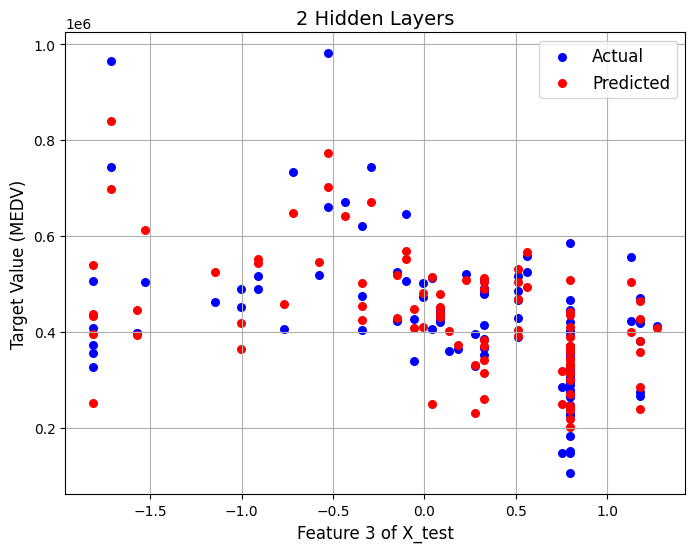

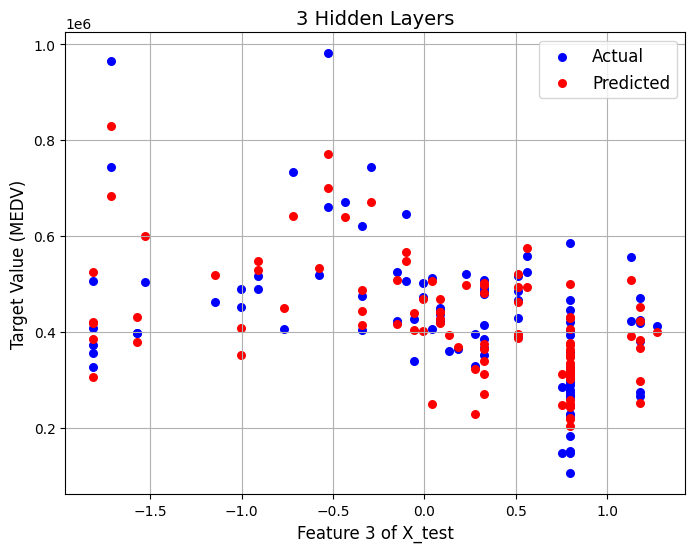

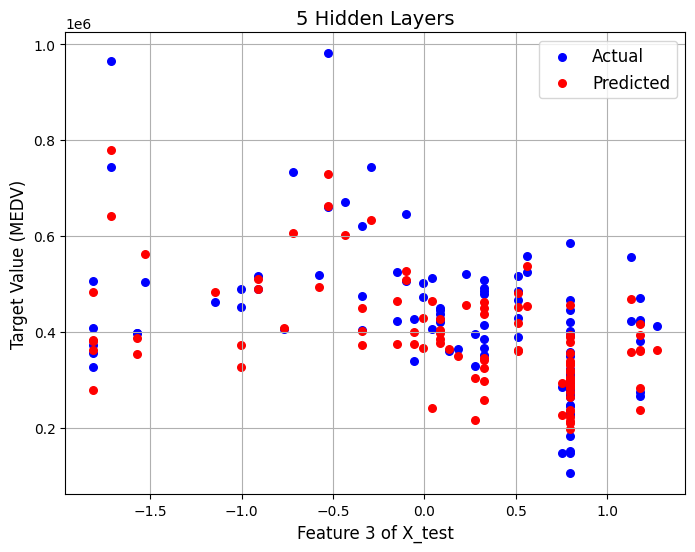

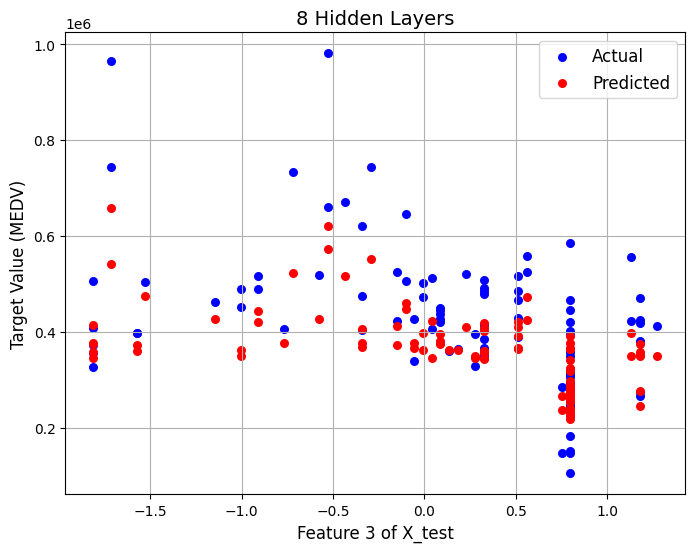

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using  feature 3 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 2], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 2], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 3 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


Since the error(Root Mean Squared Error (RMSE) and Mean
Absolute Error (MAE), Mean Absolute Percentage of Error
(MAPE) and R^2) is high using 50 epochs and 64 neurons, we have to increase the number of neurons and epochs. So let us run the code with 128 neurons and 500 epochs for :

i. Single-layer NN: 1 hidden layer

ii. Multi-layer NN (2 layers)

iii. Multi-layer NN (3 layers)

iv. Multi-layer NN (5 layers)

v. Multi-layer NN (8 layers)

Training model with 1 hidden layers...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model with 1 layers -> RMSE: 290238.5958, MAE: 278755.0938, MAPE: 69.81%, R2: -2.8329
Training model with 2 hidden layers...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model with 2 layers -> RMSE: 68661.4680, MAE: 51794.8203, MAPE: 14.93%, R2: 0.7855
Training model with 3 hidden layers...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model with 3 layers -> RMSE: 65296.8135, MAE: 48305.3789, MAPE: 13.60%, R2: 0.8060
Training model with 5 hidden layers...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model with 5 layers -> RMSE: 58747.7035, MAE: 44449.7500, MAPE: 12.34%, R2: 0.8430
Training model with 8 hidden layers...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model with 8 layers -> RMSE: 58840.4585, MAE: 44413.6641, MAPE: 12.25%, R2: 0.8425


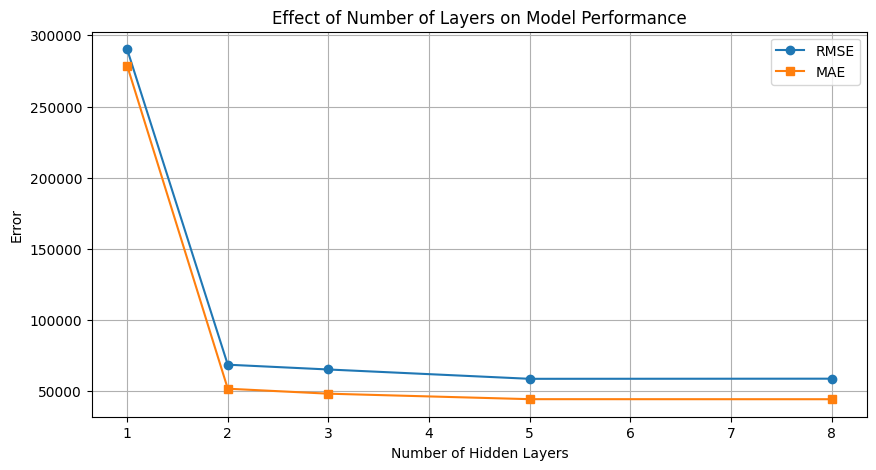

Final Comparison Table:
            RMSE            MAE       MAPE        R2
1  290238.595807  278755.093750  69.814086 -2.832922
2   68661.467971   51794.820312  14.930081  0.785491
3   65296.813521   48305.378906  13.597123  0.805999
5   58747.703547   44449.750000  12.344762  0.842963
8   58840.458462   44413.664062  12.248310  0.842467


In [ ]:
# using 500 epochs
# using 128 neurons
# Load dataset
data = pd.read_csv("/content/housing.csv")

# Assuming 'MEDV' is the target variable
X = data.drop(columns=['MEDV'])
y = data['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


def build_model(num_layers):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

layer_configs = [1, 2, 3, 5, 8]
results = {}
predictions = {}

for layers in layer_configs:
    print(f"Training model with {layers} hidden layers...")
    model = build_model(layers)
    history = model.fit(X_train, y_train, epochs=500, batch_size=5, verbose=0, validation_data=(X_test, y_test))


    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    r2 = r2_score(y_test, y_pred)

    results[layers] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}
    predictions[layers] = y_pred

    print(f"Model with {layers} layers -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}")


results_df = pd.DataFrame(results).T

# Plot RMSE & MAE vs. Number of Hidden Layers
plt.figure(figsize=(10, 5))
plt.plot(layer_configs, results_df['RMSE'], marker='o', label='RMSE')
plt.plot(layer_configs, results_df['MAE'], marker='s', label='MAE')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Error")
plt.title("Effect of Number of Layers on Model Performance")
plt.legend()
plt.grid()
plt.show()

# Display final comparison table
print("Final Comparison Table:")
print(results_df)




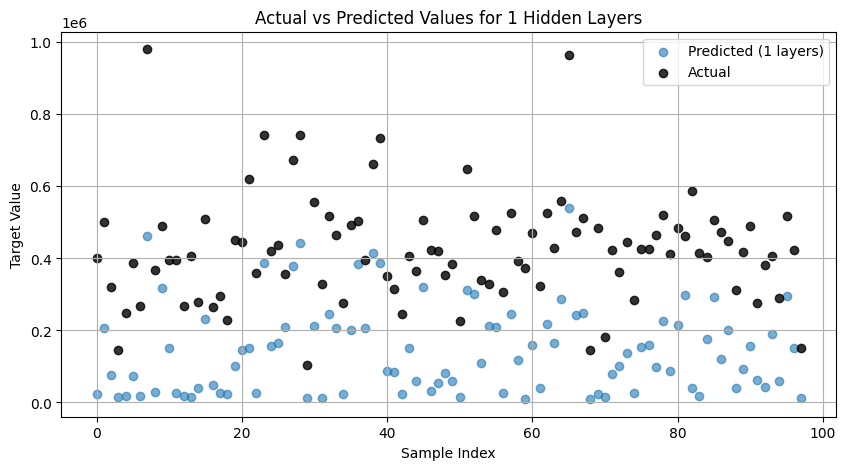

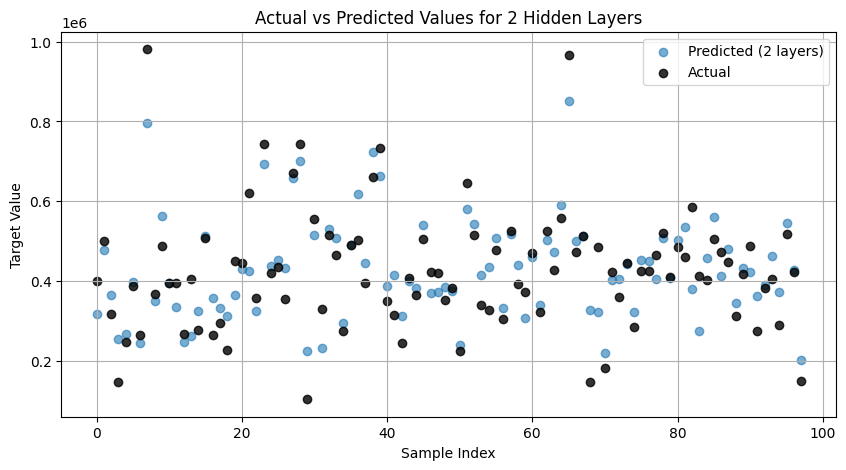

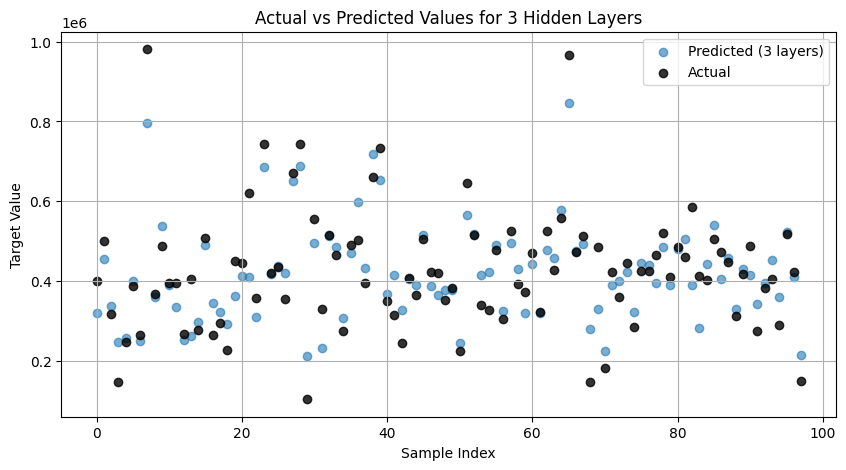

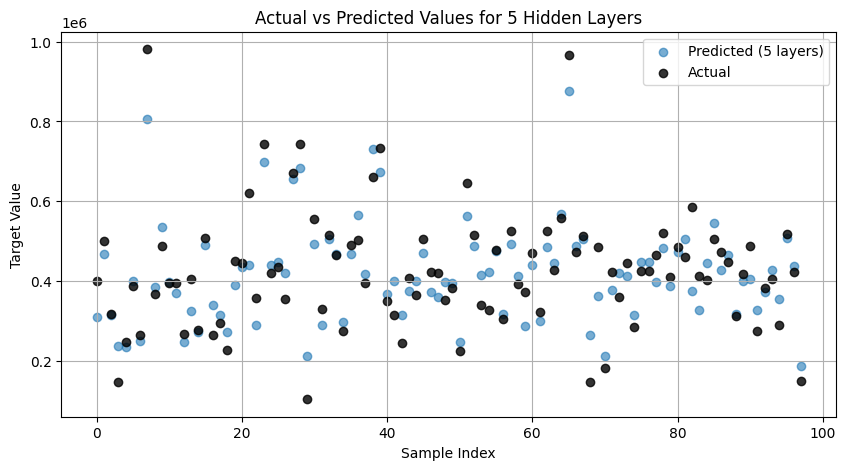

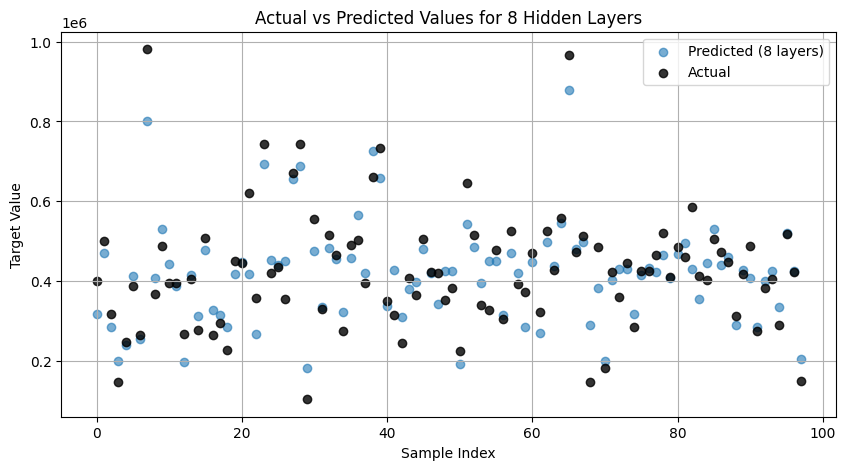

In [ ]:
# Plot Actual vs Predicted values for different layer configurations in separate graphs
for layers, y_pred in predictions.items():
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_test)), y_pred, label=f'Predicted ({layers} layers)', alpha=0.6)
    plt.scatter(range(len(y_test)), y_test, color='black', label='Actual', alpha=0.8)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.title(f"Actual vs Predicted Values for {layers} Hidden Layers")
    plt.legend()
    plt.grid()
    plt.show()


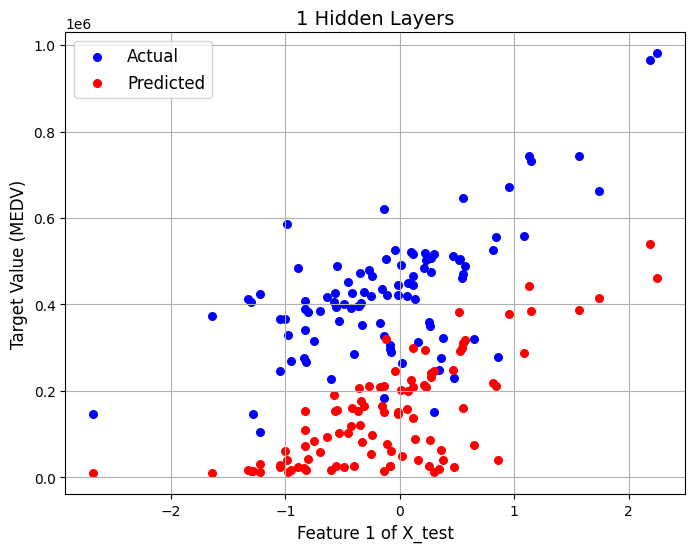

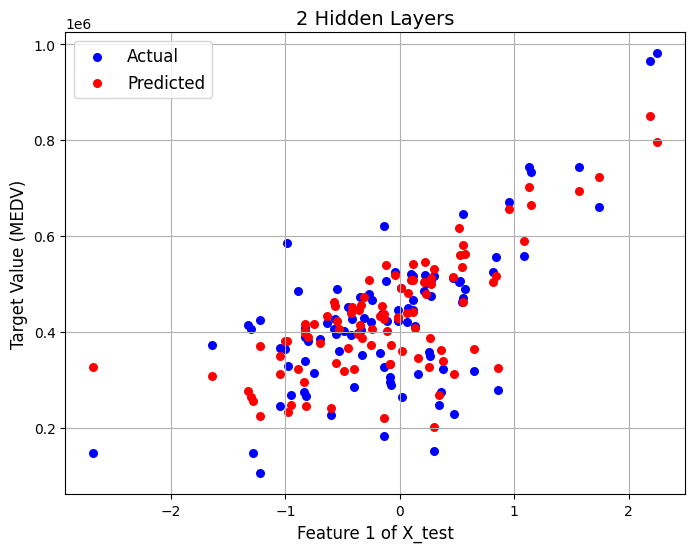

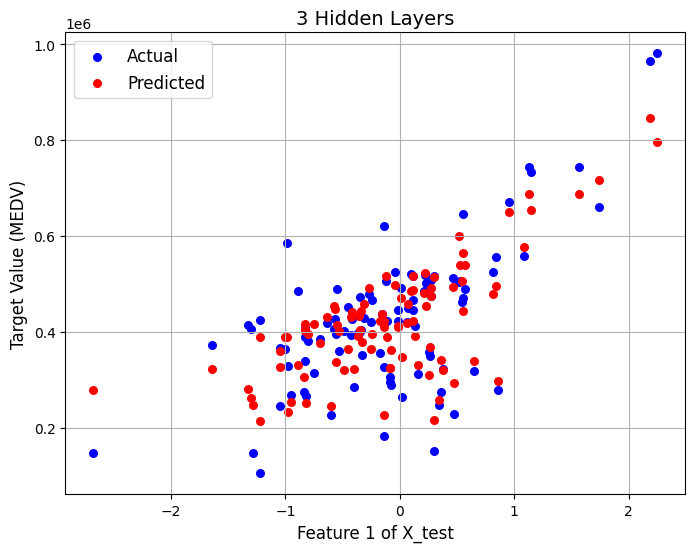

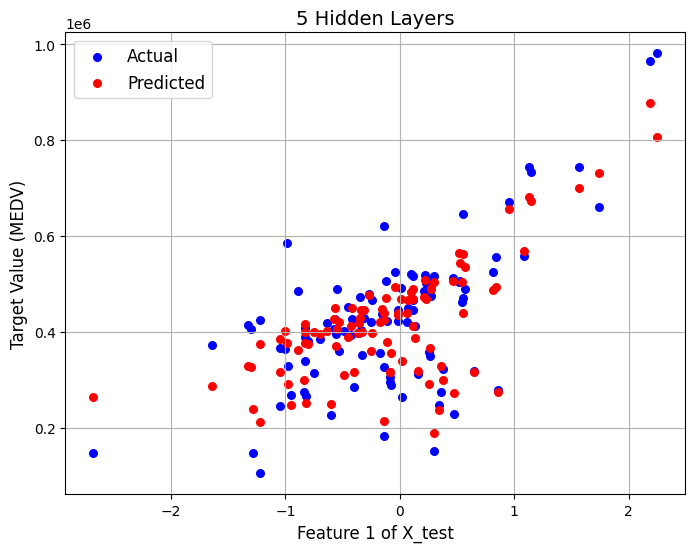

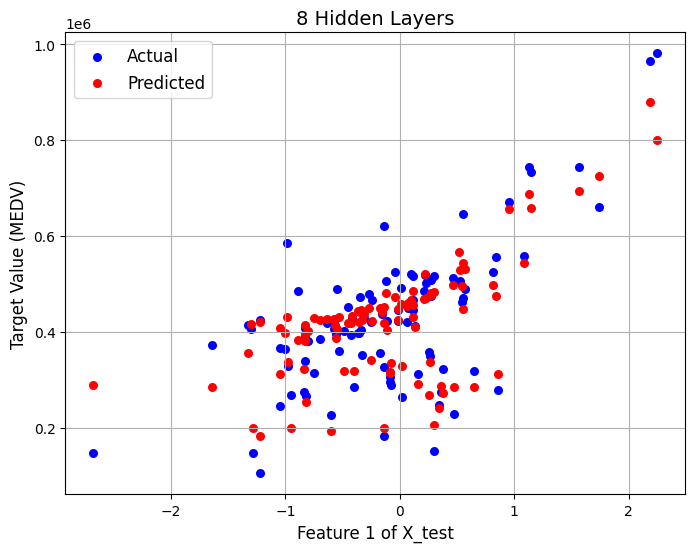

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using feature 1 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 0], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 1 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


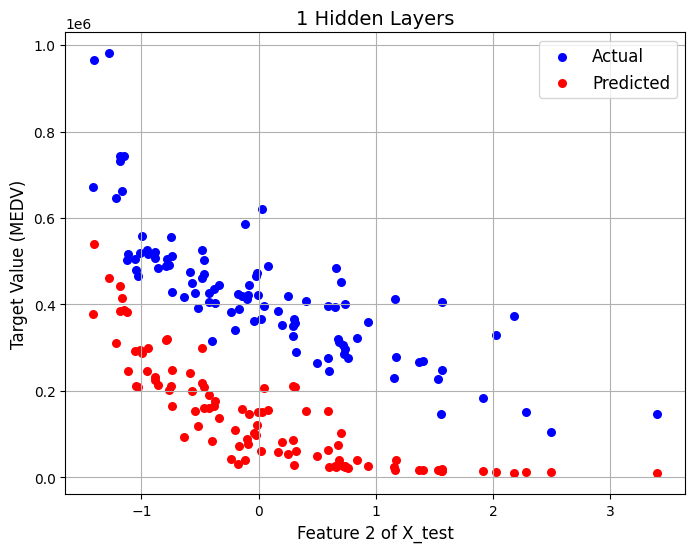

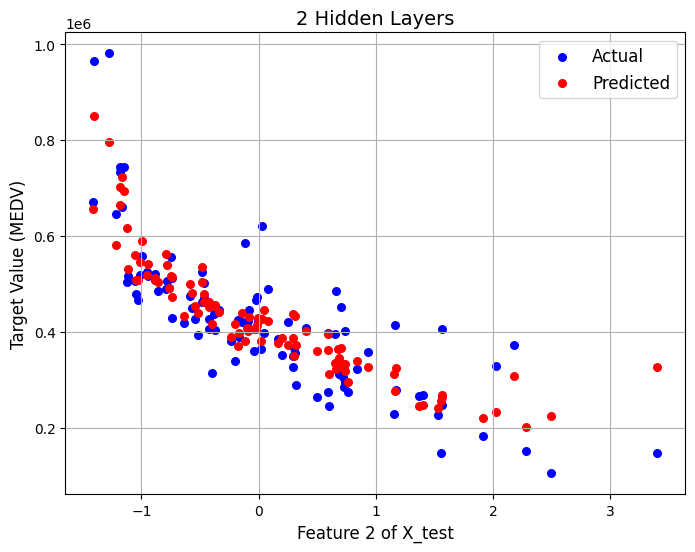

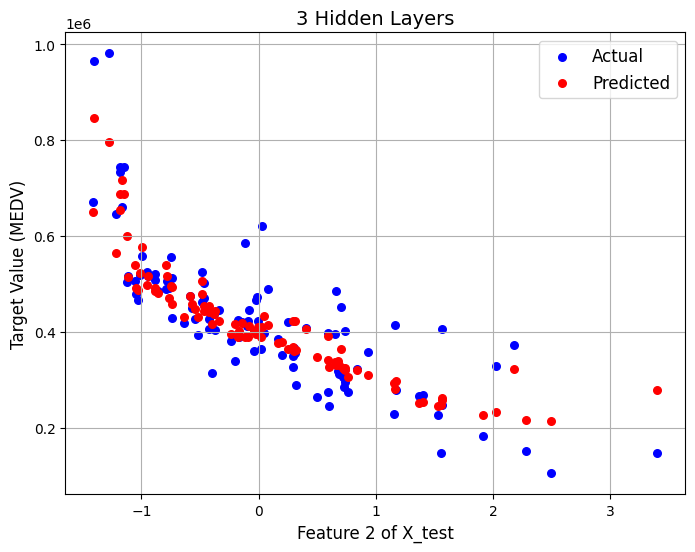

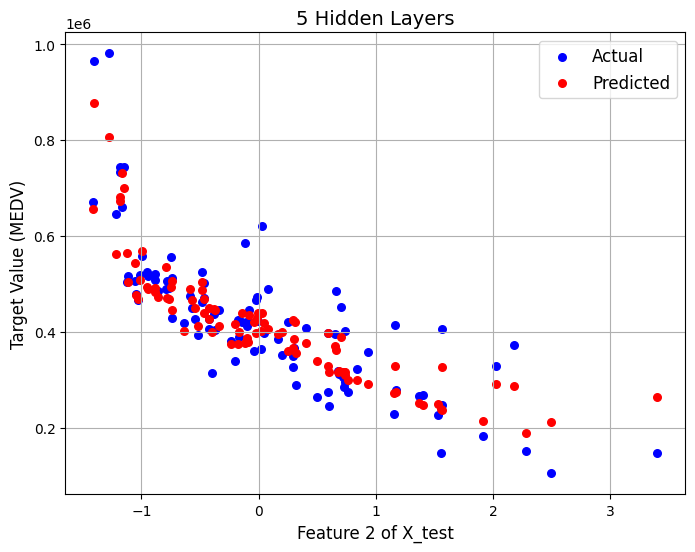

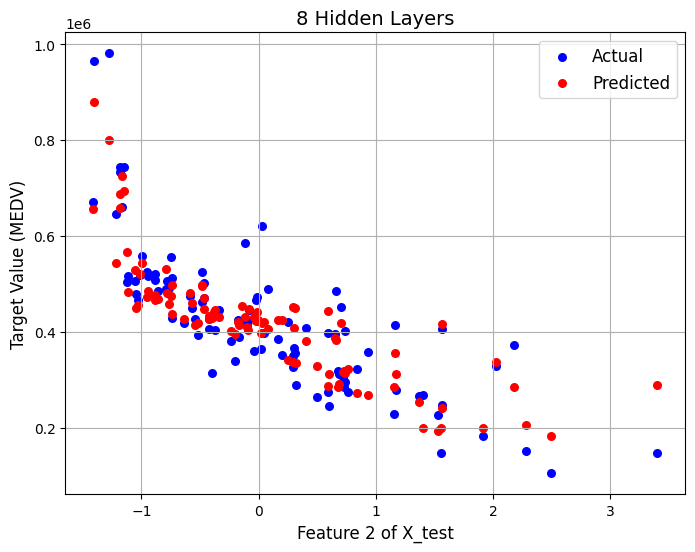

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using feature 2 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 1], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 1], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 2 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


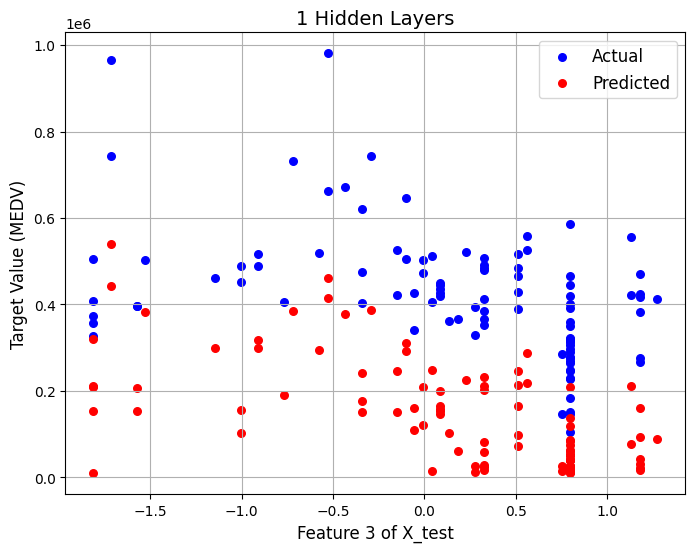

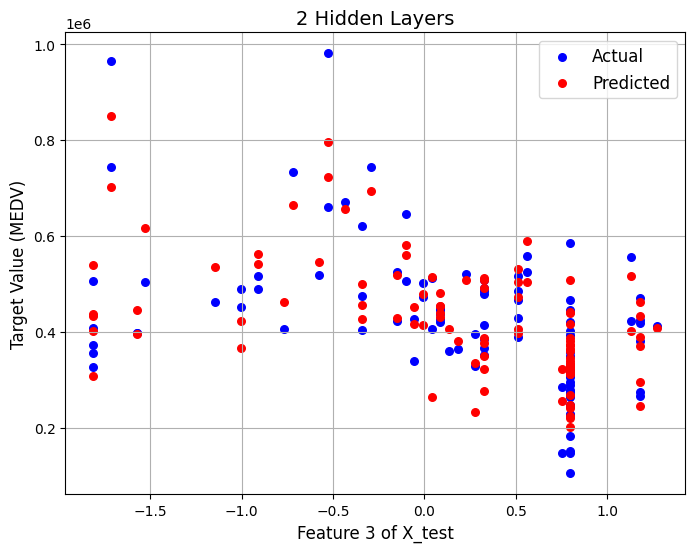

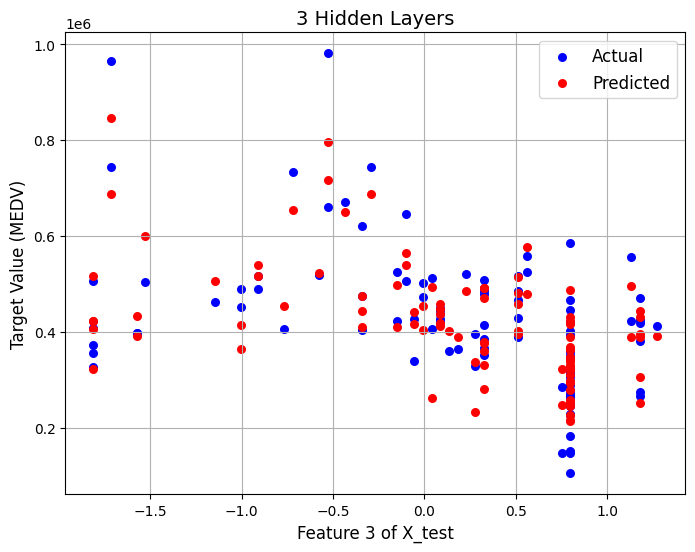

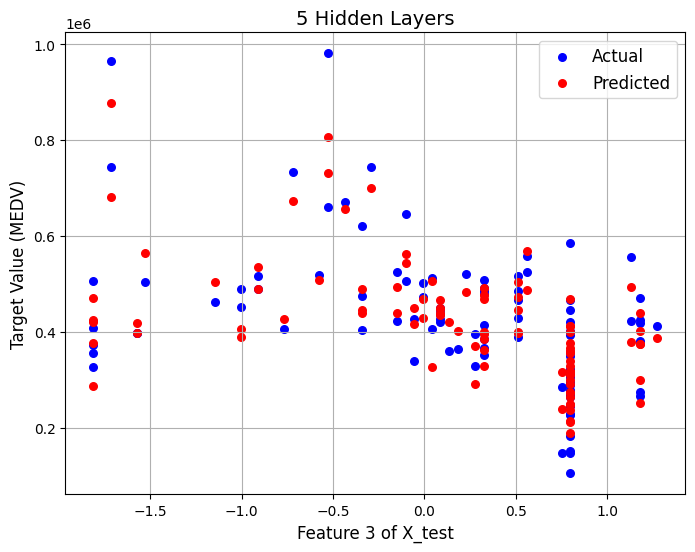

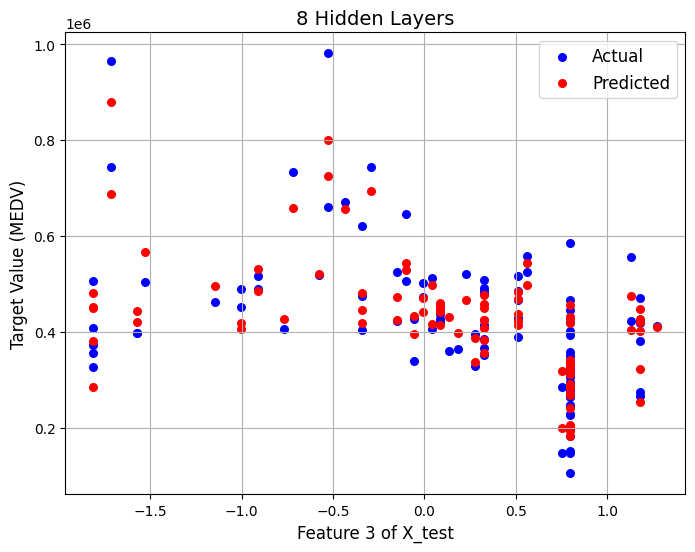

In [ ]:
# Plot Actual vs Predicted values for different layer configurations using  feature 3 of X_test as x-axis
for layers, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))

    plt.scatter(X_test[:, 2], y_test, color='blue', label="Actual", s=30)
    plt.scatter(X_test[:, 2], y_pred, color='red', label="Predicted", s=30)

    # Customize the plot
    plt.title(f"{layers} Hidden Layers", fontsize=14)
    plt.xlabel('Feature 3 of X_test', fontsize=12)
    plt.ylabel('Target Value (MEDV)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


### **IMPORTANt NOTE**

Since we have not normalized y_predicted and y_tested, the values of RMSE and MAE appear unfavorable. However, the values of MAE and R² are good. This is because RMSE and MAE depend on the range of the target variable, whereas R² and MAE are independent of it. Therefore, to reduce RMSE and MAE, we must first normalize y_predicted and y_tested.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv("/content/housing.csv")

# Assuming 'MEDV' is the target variable
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Standardizing features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Function to build model
def build_model(num_layers):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Layer configurations
layer_configs = [1, 2, 3, 5, 8]
results = {}
# Store predictions
predictions = {}

for layers in layer_configs:
    print(f"Training model with {layers} hidden layers")
    model = build_model(layers)
    history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_data=(X_test, y_test))

    # Predictions
    y_pred_scaled = model.predict(X_test).flatten()  # Predictions in normalized scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # Convert back to original scale
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Convert y_test back to original scale

    # Store predictions
    predictions[layers] = y_pred

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))  # Using normalized values
    mae = mean_absolute_error(y_test, y_pred_scaled)  # Using normalized values
    mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100  # Using original values
    r2 = r2_score(y_test_original, y_pred)  # Using original values

    results[layers] = {'RMSE (normalized)': rmse, 'MAE (normalized)': mae, 'MAPE (original)': mape, 'R2 (original)': r2}
    print(f"Model with {layers} layers -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print final results
print("Final Comparison Table:")
print(results_df)


Training model with 1 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with 1 layers -> RMSE: 0.3871, MAE: 0.2998, MAPE: 15.00%, R2: 0.8140
Training model with 2 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with 2 layers -> RMSE: 0.3797, MAE: 0.2852, MAPE: 14.88%, R2: 0.8210
Training model with 3 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model with 3 layers -> RMSE: 0.3679, MAE: 0.2804, MAPE: 13.77%, R2: 0.8320
Training model with 5 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model with 5 layers -> RMSE: 0.3775, MAE: 0.2822, MAPE: 13.70%, R2: 0.8231
Training model with 8 hidden layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model with 8 layers -> RMSE: 0.3716, MAE: 0.2795, MAPE: 14.14%, R2: 0.8286
Final Comparison Table:
   RMSE (normalized)  MAE (normalized)  MAPE (original)  R2 (original)
1           0.387126          0.299847        14.999544       0.813966
2           0.379737          0.285228        14.881820       0.821000
3           0.367932          0.280405        13.768380       0.831956
5           0.377539          0.282183        13.700114       0.823066
8           0.371592          0.279527        14.138509       0.828596


# **OBSERVATION :**

1. Adding more layers enhances feature extraction and captures complex relationships in housing price prediction.

2. Deeper networks can model non-linearity better but may suffer from overfitting.

3. Overfitting leads to poor generalization, making the model less effective on unseen data.

4. Vanishing/exploding gradients in very deep networks can hinder training convergence.

5. Regularization techniques like dropout and L2 help mitigate overfitting.
6. Early stopping prevents unnecessary training, improving generalization.
7. A model with 2-4 hidden layers is generally optimal for the Boston Housing dataset.
8. Proper hyperparameter tuning ensures a balance between depth and performance.

9. Model 1 has extremely high errors and a negative R² score, indicating poor performance and likely underfitting.
10. Model 2 and Model 3 show significant improvement, with lower errors and positive R² values.
11. Model 5 and Model 8 achieve the best performance, with the lowest RMSE, MAE, and MAPE, and an R² close to 0.84. However, increasing layers from 5 to 8 does not provide further improvement, suggesting diminishing returns.

## **Conclusion**
Adding more layers improves predictive accuracy up to a point, as seen in the decreasing RMSE, MAE, and MAPE values. However, excessive depth does not always yield better results, as seen in Model 8, where performance stagnates. A balanced architecture (2-5 hidden layers) with proper regularization and hyperparameter tuning is optimal for the Boston Housing dataset, preventing overfitting while maintaining accuracy.